In [1]:
from inference.run_inference import scrape_and_predict
from utils import get_project_root, pickle_save, pickle_load
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
from sentiment_model.data_utils.tweet_dataset import tokenize, process_token_list
import os
from visualisation.plotting import plot_stacked_bar, plot_date_dist, plot_sentiment, plot_text_lengths, plot_word_cloud
import datetime

In [79]:
SAVING = True
#keyword = ["Elon", "Musk"]
# keyword = ["Bitcoin", "Crypto"]
keyword = ['iPhone']

In [80]:
sentiment, text_sentiment, tweet_df = scrape_and_predict(keyword=keyword, start_date="2021-01-1", end_date="now", max_tweets=25000)

Using custom data configuration SetFit--tweet_sentiment_extraction-60a81958566f1313
Found cached dataset json (C:/Users/20172613/.cache/huggingface/datasets/SetFit___json/SetFit--tweet_sentiment_extraction-60a81958566f1313/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:02<00:00,  3.00it/s]


In [81]:
if SAVING:
    df_name = "_".join(keyword) if type(keyword) == list else keyword
    df_save_path = os.path.join(get_project_root(), Path(f"sentiment_model/checkpoints/scraped_dataset/df_{df_name}.p"))
    pickle_save(tweet_df, df_save_path)

In [82]:
df_name = "_".join(keyword) if type(keyword) == list else keyword
df_save_path = os.path.join(get_project_root(), Path(f"sentiment_model/checkpoints/scraped_dataset/df_{df_name}.p"))
tweet_df = pickle_load(df_save_path)

df_sub = tweet_df[("2021-6-22" < tweet_df['date']) & (tweet_df['date']<="2021-7-22")]

df_sub = tweet_df[(tweet_df['date'].dt.month.isin([8,9,10,11])) & (tweet_df['date'].dt.year==2016)]
df_sub = tweet_df[(tweet_df['date'].dt.year.isin([2021,2022]))]
df_sub[df_sub['sentiment_label'] == "negative"]


plot_df, fig= plot_stacked_bar(df_sub, by="month", title="Sentiment Tweets mentioning iPhone")
#fig.savefig(f"visualisation/figures/{df_name}_2021_2022_sentiment_ratio.png", dpi=400)

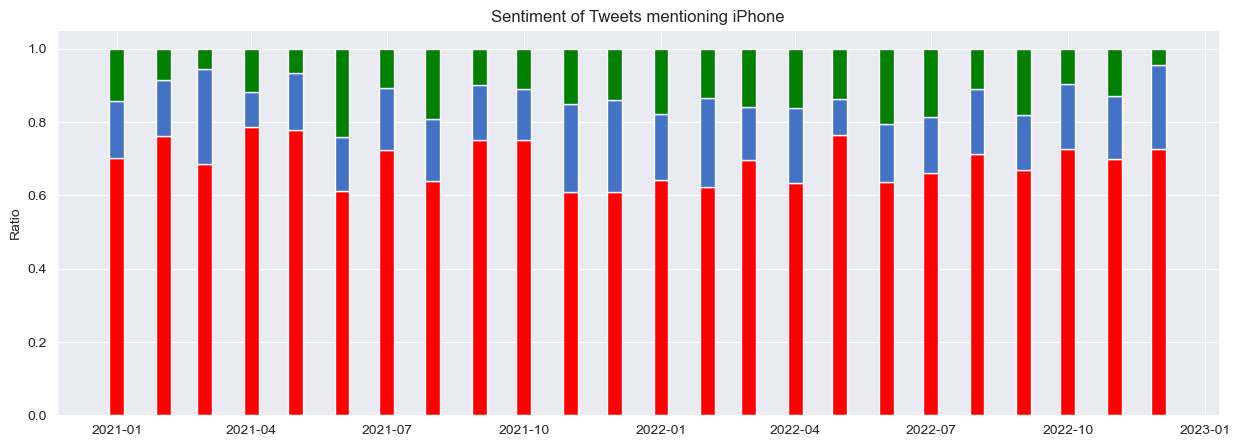

In [88]:
plot_df, fig = plot_stacked_bar(tweet_df, by="month", title="Sentiment of Tweets mentioning iPhone")
fig.savefig(f"visualisation/figures/{df_name}_sentiment_ratio.png", dpi=400)

In [84]:
ax = fig.get_axes()[0]
ax.arrow(datetime.date(2021, 5, 13), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='r', edgecolor='black')
# ax.arrow(datetime.date(2021, 5, 16), 1.2, 0, -0.05, width=2.5, head_length=0.05, facecolor='r', edgecolor='black')
# ax.arrow(datetime.date(2021, 5, 17), 1.1, 0, -0.05, width=2.5, head_length=0.05, facecolor='g', edgecolor='black')
ax.arrow(datetime.date(2021, 5, 24), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='g', edgecolor='black')
ax.arrow(datetime.date(2021, 6, 4), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='r', edgecolor='black')
ax.arrow(datetime.date(2021, 6, 13), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='g', edgecolor='black')
datetime.date(2021, 5, 13)
#ax.annotate("hello", xy=(datetime.date(2021, 5, 13), 1.2), arrowprops=dict(arrowstyle="->", width=0.05))
fig.savefig(f"visualisation/figures/{df_name}_sentiment_ratio.png", dpi=400)

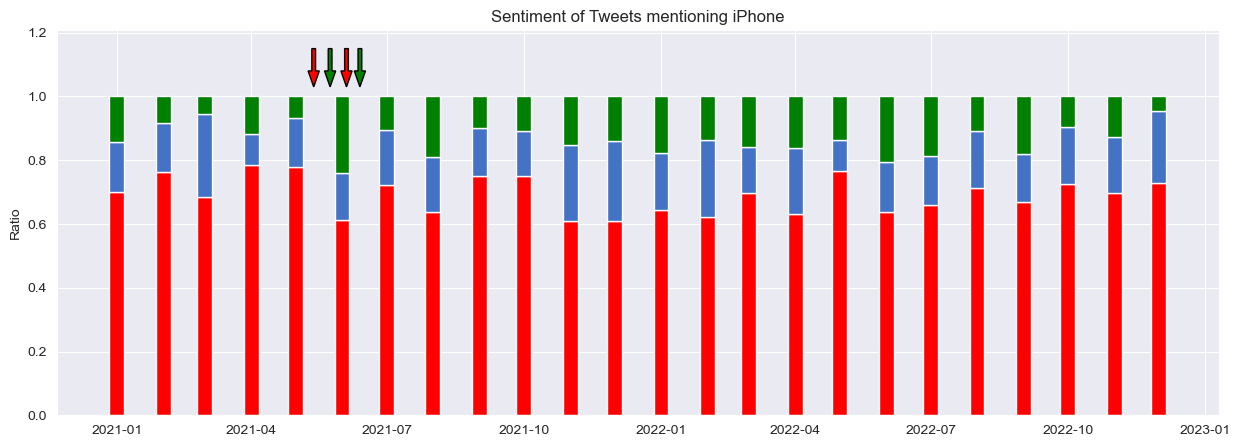

In [85]:
fig

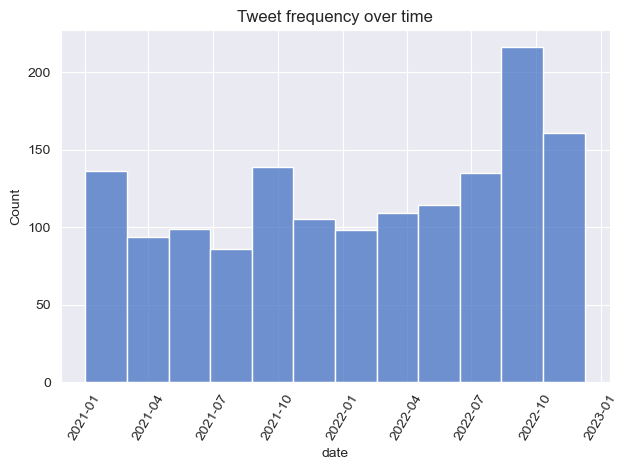

In [89]:
fig = plot_date_dist(tweet_df)
fig.tight_layout()
fig.savefig(f"visualisation/figures/{df_name}_tweet_freq.png", dpi=400)

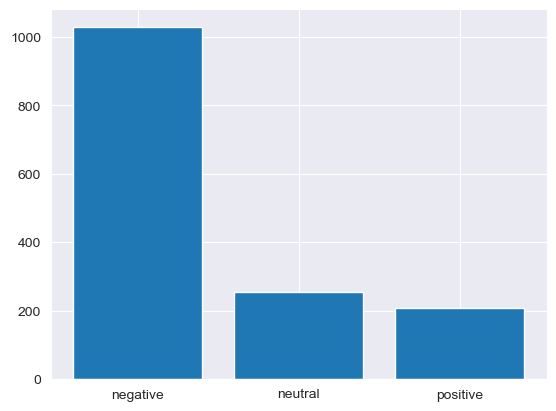

In [90]:
plot_sentiment(tweet_df)

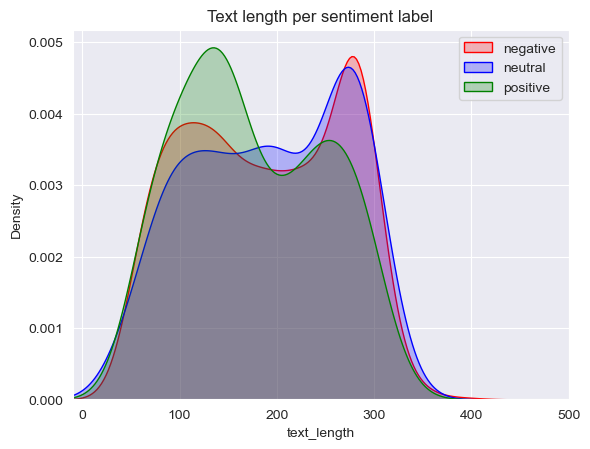

In [91]:
plot_text_lengths(tweet_df)

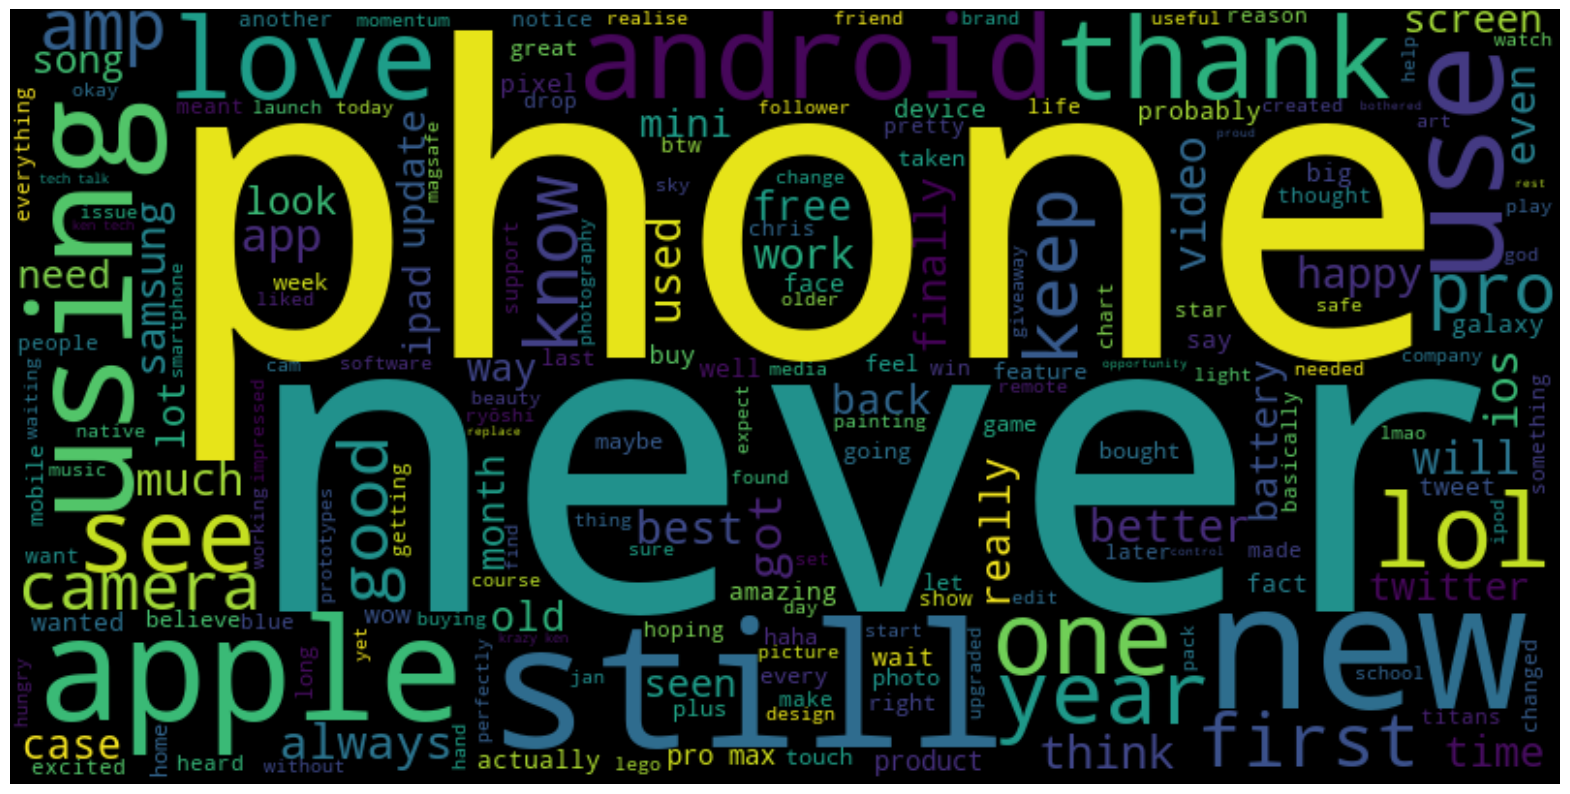

In [92]:
fig = plot_word_cloud(tweet_df, keyword, "positive")
fig.savefig(f"visualisation/figures/{df_name}_world_cloud_pos.png", dpi=400)

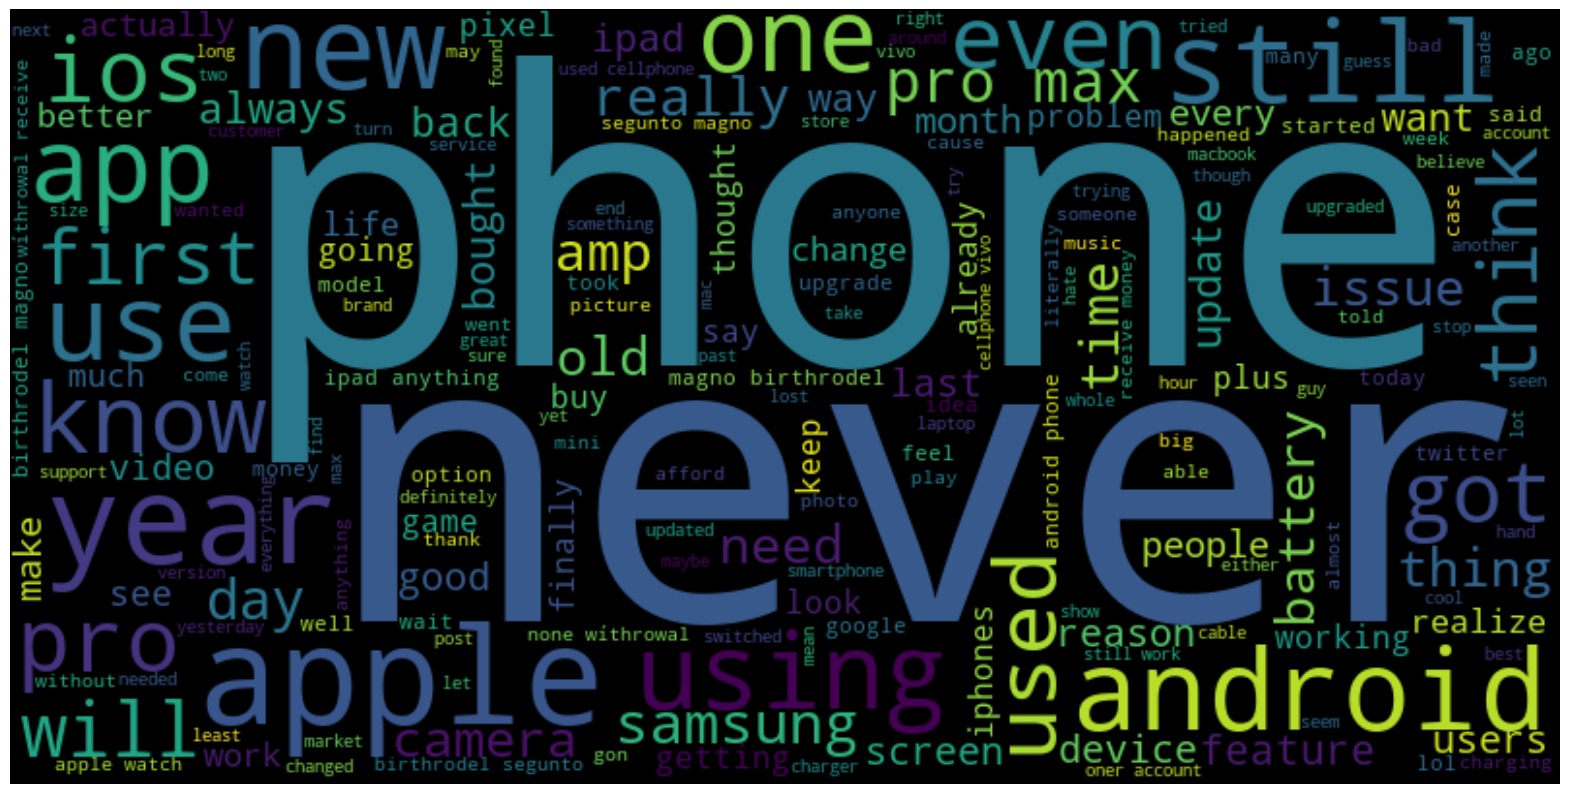

In [93]:
fig = plot_word_cloud(tweet_df, keyword, "negative")
fig.savefig(f"visualisation/figures/{df_name}_world_cloud_neg.png", dpi=400)